## Lots of Imports for tools that would normally be used in a project

In [1]:
# My created .py files for modularization
import env
import os
import acquire
import prepare
# Array and Dataframes
import numpy as np
import pandas as pd
# Load datasets
from pydataset import data
# Evaluation: Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Evaluation: Statistical Analysis
from scipy import stats
# Modeling
from sklearn.linear_model import LogisticRegression as lr
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
def compute_metrics(TN,FP,FN,TP):
    all_ = (TP + TN + FP + FN)

    accuracy = (TP + TN) / all_

    TPR = recall = TP / (TP + FN)
    FPR = FP / (FP + TN)

    TNR = TN / (FP + TN)
    FNR = FN / (FN + TP)

    precision =  TP / (TP + FP)
    f1 =  2 * ((precision * recall) / ( precision + recall))

    support_pos = TP + FN
    support_neg = FP + TN

    print(f"Accuracy: {accuracy}\n")
    print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
    print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
    print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
    print(f"False Negative Rate/Miss Rate: {FNR}\n")
    print(f"Precision/PPV: {precision}")
    print(f"F1 Score: {f1}\n")
    print(f"Support (0): {support_pos}")
    print(f"Support (1): {support_neg}")


## Questions
#### In these exercises, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

For all of the models you create, choose a threshold that optimizes for accuracy.

Create a new notebook, logistic_regression, use it to answer the following questions:

Create a model that includes only age, fare, and pclass. Does this model perform better than your baseline?

Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

Try out other combinations of features and models.

Use you best 3 models to predict and evaluate on your validate sample.

Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

## Acquire

In [3]:
# acquiring and preparing data
# prep_titanic has acquire built in
titanic = prepare.prep_titanic()

## Splitting Data

In [4]:
train, validate, test  = prepare.splitter(titanic,target='survived')

In [5]:
# determining baseline
train['survived'].value_counts()

survived
0    307
1    191
Name: count, dtype: int64

In [6]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,male,embarked_Q,embarked_S
583,583,0,1,male,36.0,0,0,40.1250,C,1,1,0.0,0.0
165,165,1,3,male,9.0,0,2,20.5250,S,0,1,0.0,1.0
50,50,0,3,male,7.0,4,1,39.6875,S,0,1,0.0,1.0
259,259,1,2,female,50.0,0,1,26.0000,S,0,0,0.0,1.0
306,306,1,1,female,30.0,0,0,110.8833,C,1,0,0.0,0.0


## Fit & Train

In [7]:
x_train = train[['pclass','age','fare']]
y_train = train[['survived']]
y_train = y_train.values.ravel()

x_val = validate[['pclass','age','fare']]
y_val = validate[['survived']]
y_val = y_val.values.ravel()

x_test = test[['pclass','age','fare']]
y_test = test[['survived']]
y_test = y_test.values.ravel()

In [8]:
logit = lr(C=1, random_state=4343)

In [9]:
logit.fit(x_train,y_train)

LogisticRegression(C=1, random_state=4343)

In [10]:
model1_prediction = logit.predict(x_train)
model1_probability = logit.predict_proba(x_train)

model1_prediction_val = logit.predict(x_val)
model1_probability_val = logit.predict_proba(x_val)

model1_prediction_test = logit.predict(x_test)
model1_probability_test = logit.predict_proba(x_test)

## Evaluation

In [11]:
cm = confusion_matrix(y_train,model1_prediction)
cm_disp = ConfusionMatrixDisplay(cm,display_labels=logit.classes_)

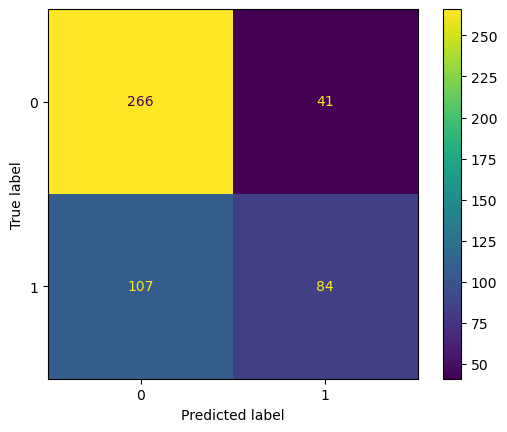

In [12]:
cm_disp.plot()
plt.show()

## Metrics for Train

In [13]:
TN, FP, FN, TP = confusion_matrix(y_train, model1_prediction).ravel()
print(classification_report(y_train,model1_prediction))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78       307
           1       0.67      0.44      0.53       191

    accuracy                           0.70       498
   macro avg       0.69      0.65      0.66       498
weighted avg       0.70      0.70      0.69       498



In [14]:
pd.DataFrame(
    confusion_matrix(y_train,model1_prediction),
    columns = ['pred survived','pred opposite'], index=['actual opposite','actual survived']
)

,pred survived,pred opposite
actual opposite,266,41
actual survived,107,84


## Accuracy, Precision, Rates

In [15]:
compute_metrics(TN, FP, FN, TP)

Accuracy: 0.7028112449799196

True Positive Rate/Sensitivity/Recall/Power: 0.4397905759162304
False Positive Rate/False Alarm Ratio/Fall-out: 0.13355048859934854
True Negative Rate/Specificity/Selectivity: 0.8664495114006515
False Negative Rate/Miss Rate: 0.5602094240837696

Precision/PPV: 0.672
F1 Score: 0.5316455696202532

Support (0): 191
Support (1): 307


## Metrics for Validate & Test

In [16]:
TN, FP, FN, TP = confusion_matrix(y_val, model1_prediction_val).ravel()
print(classification_report(y_val,model1_prediction_val))

TN, FP, FN, TP = confusion_matrix(y_test, model1_prediction_test).ravel()
print(classification_report(y_test,model1_prediction_test))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79       132
           1       0.70      0.43      0.53        82

    accuracy                           0.71       214
   macro avg       0.71      0.66      0.66       214
weighted avg       0.71      0.71      0.69       214

              precision    recall  f1-score   support

           0       0.74      0.84      0.79       110
           1       0.67      0.54      0.60        69

    accuracy                           0.72       179
   macro avg       0.71      0.69      0.69       179
weighted avg       0.72      0.72      0.71       179



In [81]:
def get_classification_report(x_test, y_pred):
    '''Source: https://stackoverflow.com/questions/39662398/scikit-learn-output-metrics-classification-report-into-csv-tab-delimited-format'''
    report = classification_report(x_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
    return df_classification_report

In [82]:
get_classification_report(x_test,y_test)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [17]:
# validate
pd.DataFrame(
    confusion_matrix(y_val,model1_prediction_val),
    columns = ['pred survived','pred opposite'], index=['actual opposite','actual survived']
)

,pred survived,pred opposite
actual opposite,117,15
actual survived,47,35


In [18]:
# test
pd.DataFrame(
    confusion_matrix(y_test,model1_prediction_test),
    columns = ['pred survived','pred opposite'], index=['actual opposite','actual survived']
)

,pred survived,pred opposite
actual opposite,92,18
actual survived,32,37


## Comparing C (C=) In Test Set - *Inverse of Regularization Strength*

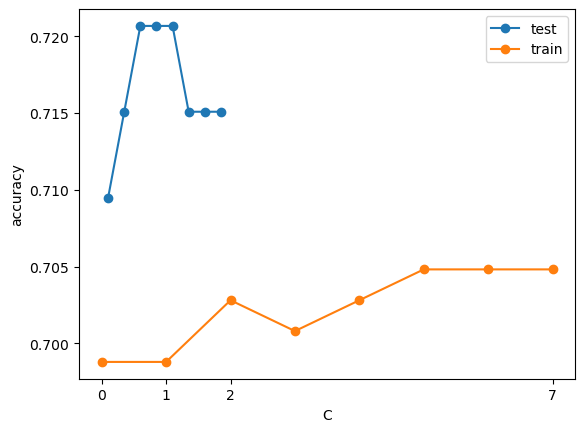

In [19]:
c_range = np.arange(.1, 2, .25)
train_scores = []
test_scores = []
for c in c_range:
    logit_chart = lr(C = c,random_state=4343)
    logit_chart.fit(x_train, y_train)
    train_scores.append(logit_chart.score(x_train, y_train))
    test_scores.append(logit_chart.score(x_test, y_test))
plt.figure()
plt.xlabel('C')
plt.ylabel('accuracy')
plt.plot(c_range, test_scores,'o-',train_scores,'o-')
plt.legend(['test','train'])
plt.xticks([0,1,2,7])
plt.show()


## Model 2: Including 'sex' ('male') to Model 1

In [20]:
x_train1 = train[['pclass','age','fare','male']]
y_train1 = train[['survived']]
y_train1 = y_train1.values.ravel()

x_val1 = validate[['pclass','age','fare','male']]
y_val1 = validate[['survived']]
y_val1 = y_val1.values.ravel()

x_test1 = test[['pclass','age','fare','male']]
y_test1 = test[['survived']]
y_test1 = y_test1.values.ravel()

In [21]:
logit1 = lr(C=1, random_state=4343)

In [22]:
logit1.fit(x_train1,y_train1)

LogisticRegression(C=1, random_state=4343)

In [34]:
model1_prediction = logit1.predict(x_train1)
model1_probability = logit1.predict_proba(x_train1)

model1_prediction_val = logit1.predict(x_val1)
model1_probability_val = logit1.predict_proba(x_val1)

model1_prediction_test = logit1.predict(x_test1)
model1_probability_test = logit1.predict_proba(x_test1)

In [35]:
cm1 = confusion_matrix(y_train,model2_prediction)
cm_disp1 = ConfusionMatrixDisplay(cm1,display_labels=logit.classes_)

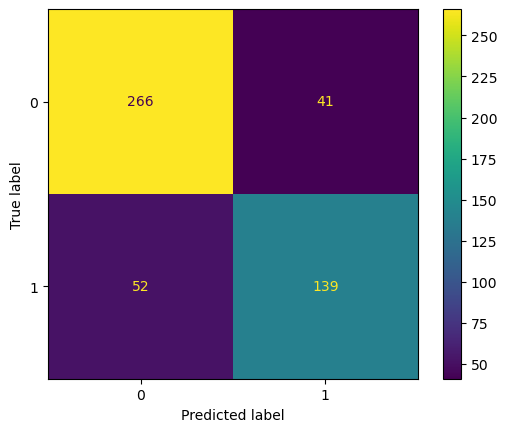

In [36]:
cm_disp1.plot()
plt.show()

In [37]:
TN, FP, FN, TP = confusion_matrix(y_train, model2_prediction).ravel()
print(classification_report(y_train,model2_prediction))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       307
           1       0.77      0.73      0.75       191

    accuracy                           0.81       498
   macro avg       0.80      0.80      0.80       498
weighted avg       0.81      0.81      0.81       498



In [38]:
pd.DataFrame(
    confusion_matrix(y_train,model2_prediction),
    columns = ['pred survived','pred opposite'], index=['actual opposite','actual survived']
)

,pred survived,pred opposite
actual opposite,266,41
actual survived,52,139


In [39]:
compute_metrics(TN, FP, FN, TP)

Accuracy: 0.8132530120481928

True Positive Rate/Sensitivity/Recall/Power: 0.7277486910994765
False Positive Rate/False Alarm Ratio/Fall-out: 0.13355048859934854
True Negative Rate/Specificity/Selectivity: 0.8664495114006515
False Negative Rate/Miss Rate: 0.27225130890052357

Precision/PPV: 0.7722222222222223
F1 Score: 0.7493261455525607

Support (0): 191
Support (1): 307


In [40]:
TN, FP, FN, TP = confusion_matrix(y_val1, model1_prediction_val).ravel()
print(classification_report(y_val1,model1_prediction_val))

TN, FP, FN, TP = confusion_matrix(y_test1, model1_prediction_test).ravel()
print(classification_report(y_test1,model1_prediction_test))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       132
           1       0.72      0.67      0.70        82

    accuracy                           0.78       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.77      0.78      0.77       214

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       110
           1       0.77      0.71      0.74        69

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [42]:
# validate
pd.DataFrame(
    confusion_matrix(y_val1,model1_prediction_val),
    columns = ['pred survived','pred opposite'], index=['actual opposite','actual survived']
)

,pred survived,pred opposite
actual opposite,111,21
actual survived,27,55


In [41]:
# test
pd.DataFrame(
    confusion_matrix(y_test1,model1_prediction_test),
    columns = ['pred survived','pred opposite'], index=['actual opposite','actual survived']
)

,pred survived,pred opposite
actual opposite,95,15
actual survived,20,49


In [43]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,male,embarked_Q,embarked_S
583,583,0,1,male,36.0,0,0,40.1250,C,1,1,0.0,0.0
165,165,1,3,male,9.0,0,2,20.5250,S,0,1,0.0,1.0
50,50,0,3,male,7.0,4,1,39.6875,S,0,1,0.0,1.0
259,259,1,2,female,50.0,0,1,26.0000,S,0,0,0.0,1.0
306,306,1,1,female,30.0,0,0,110.8833,C,1,0,0.0,0.0


## Model 3: Removed 'fare' for 'sibsp'

In [46]:
x_train3 = train[['pclass','age','sibsp','male']]
y_train3 = train[['survived']]
y_train3 = y_train3.values.ravel()

x_val3 = validate[['pclass','age','sibsp','male']]
y_val3 = validate[['survived']]
y_val3 = y_val3.values.ravel()

x_test3 = test[['pclass','age','sibsp','male']]
y_test3 = test[['survived']]
y_test3 = y_test3.values.ravel()

In [49]:
logit3 = lr(C=1, random_state=4343)

In [50]:
logit3.fit(x_train3,y_train3)

LogisticRegression(C=1, random_state=4343)

In [51]:
model3_prediction = logit3.predict(x_train3)
model3_probability = logit3.predict_proba(x_train3)

model3_prediction_val = logit3.predict(x_val3)
model3_probability_val = logit3.predict_proba(x_val3)

model3_prediction_test = logit3.predict(x_test3)
model3_probability_test = logit3.predict_proba(x_test3)

In [52]:
cm3 = confusion_matrix(y_train,model3_prediction)
cm_disp3 = ConfusionMatrixDisplay(cm3,display_labels=logit.classes_)

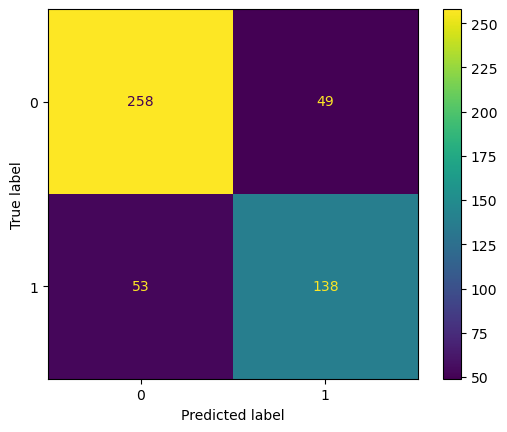

In [53]:
cm_disp3.plot()
plt.show()

In [54]:
TN, FP, FN, TP = confusion_matrix(y_train, model3_prediction).ravel()
print(classification_report(y_train,model3_prediction))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       307
           1       0.74      0.72      0.73       191

    accuracy                           0.80       498
   macro avg       0.78      0.78      0.78       498
weighted avg       0.79      0.80      0.79       498



In [55]:
pd.DataFrame(
    confusion_matrix(y_train,model3_prediction),
    columns = ['pred survived','pred opposite'], index=['actual opposite','actual survived']
)

,pred survived,pred opposite
actual opposite,258,49
actual survived,53,138


In [56]:
compute_metrics(TN, FP, FN, TP)

Accuracy: 0.7951807228915663

True Positive Rate/Sensitivity/Recall/Power: 0.7225130890052356
False Positive Rate/False Alarm Ratio/Fall-out: 0.15960912052117263
True Negative Rate/Specificity/Selectivity: 0.8403908794788274
False Negative Rate/Miss Rate: 0.2774869109947644

Precision/PPV: 0.7379679144385026
F1 Score: 0.73015873015873

Support (0): 191
Support (1): 307


In [57]:
TN, FP, FN, TP = confusion_matrix(y_val3, model3_prediction_val).ravel()
print(classification_report(y_val3,model3_prediction_val))

TN, FP, FN, TP = confusion_matrix(y_test3, model3_prediction_test).ravel()
print(classification_report(y_test3,model3_prediction_test))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       132
           1       0.70      0.63      0.67        82

    accuracy                           0.76       214
   macro avg       0.74      0.73      0.74       214
weighted avg       0.75      0.76      0.75       214

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       110
           1       0.71      0.72      0.72        69

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [60]:
# validate
pd.DataFrame(
    confusion_matrix(y_val3,model3_prediction_val),
    columns = ['pred survived','pred opposite'], index=['actual opposite','actual survived']
)


,pred survived,pred opposite
actual opposite,110,22
actual survived,30,52


In [59]:
# test
pd.DataFrame(
    confusion_matrix(y_test3,model3_prediction_test),
    columns = ['pred survived','pred opposite'], index=['actual opposite','actual survived']
)

,pred survived,pred opposite
actual opposite,90,20
actual survived,19,50


## Model 4: 'embarked_Q', 'embarked_S', 'male'

In [62]:
x_train4 = train[['embarked_Q','embarked_S','male']]
y_train4 = train[['survived']]
y_train4 = y_train4.values.ravel()

x_val4 = validate[['embarked_Q','embarked_S','male']]
y_val4 = validate[['survived']]
y_val4 = y_val4.values.ravel()

x_test4 = test[['embarked_Q','embarked_S','male']]
y_test4 = test[['survived']]
y_test4 = y_test4.values.ravel()

In [64]:
logit4 = lr(C=1, random_state=4343)

In [68]:
logit4.fit(x_train4,y_train4)

LogisticRegression(C=1, random_state=4343)

In [69]:
model4_prediction = logit4.predict(x_train4)
model4_probability = logit4.predict_proba(x_train4)

model4_prediction_val = logit4.predict(x_val4)
model4_probability_val = logit4.predict_proba(x_val4)

model4_prediction_test = logit4.predict(x_test4)
model4_probability_test = logit4.predict_proba(x_test4)

In [70]:
cm4 = confusion_matrix(y_train,model4_prediction)
cm_disp4 = ConfusionMatrixDisplay(cm4,display_labels=logit.classes_)

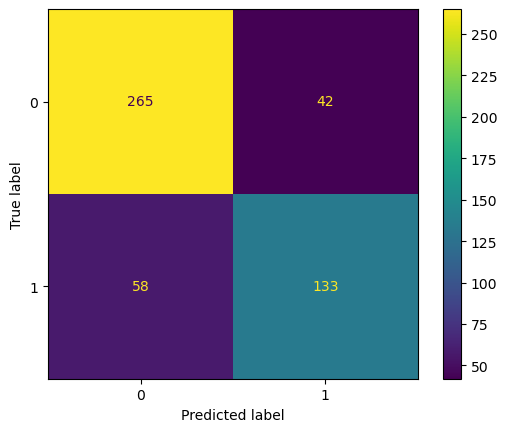

In [71]:
cm_disp4.plot()
plt.show()

In [72]:
TN, FP, FN, TP = confusion_matrix(y_train, model4_prediction).ravel()
print(classification_report(y_train,model4_prediction))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       307
           1       0.76      0.70      0.73       191

    accuracy                           0.80       498
   macro avg       0.79      0.78      0.78       498
weighted avg       0.80      0.80      0.80       498



In [73]:
pd.DataFrame(
    confusion_matrix(y_train,model4_prediction),
    columns = ['pred survived','pred opposite'], index=['actual opposite','actual survived']
)

,pred survived,pred opposite
actual opposite,265,42
actual survived,58,133


In [74]:
compute_metrics(TN, FP, FN, TP)

Accuracy: 0.7991967871485943

True Positive Rate/Sensitivity/Recall/Power: 0.6963350785340314
False Positive Rate/False Alarm Ratio/Fall-out: 0.13680781758957655
True Negative Rate/Specificity/Selectivity: 0.8631921824104235
False Negative Rate/Miss Rate: 0.3036649214659686

Precision/PPV: 0.76
F1 Score: 0.726775956284153

Support (0): 191
Support (1): 307


In [76]:
TN, FP, FN, TP = confusion_matrix(y_val4, model4_prediction_val).ravel()
print(classification_report(y_val4,model4_prediction_val))

TN, FP, FN, TP = confusion_matrix(y_test4, model4_prediction_test).ravel()
print(classification_report(y_test4,model4_prediction_test))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       132
           1       0.70      0.66      0.68        82

    accuracy                           0.76       214
   macro avg       0.75      0.74      0.74       214
weighted avg       0.76      0.76      0.76       214

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       110
           1       0.74      0.67      0.70        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



In [77]:
# validate
pd.DataFrame(
    confusion_matrix(y_val4,model4_prediction_val),
    columns = ['pred survived','pred opposite'], index=['actual opposite','actual survived']
)

,pred survived,pred opposite
actual opposite,109,23
actual survived,28,54


In [78]:
# test
pd.DataFrame(
    confusion_matrix(y_test4,model4_prediction_test),
    columns = ['pred survived','pred opposite'], index=['actual opposite','actual survived']
)

,pred survived,pred opposite
actual opposite,94,16
actual survived,23,46
